<a href="https://colab.research.google.com/github/XavierCarrera/Platzi-Master-DS-Exercises/blob/master/Basic_Exercise_DS_Python2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats 
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Read the csv file and show columns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

In [4]:
df = pd.read_csv('cruise_ship_info.csv')
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

# 2. Basic statistic analysis

In [5]:
pd.isnull(df).sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

In [6]:
df[df.duplicated()]

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew


In [7]:
df[["Age", "Tonnage", "passengers", "length", "cabins", "passenger_density", "crew"]].describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


<function matplotlib.pyplot.show>

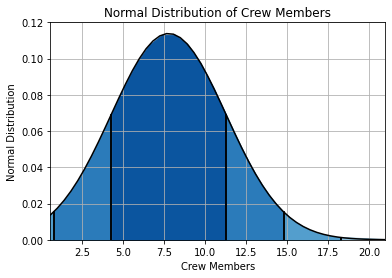

In [8]:
# CREW ANALYSIS -- NORMAL DISTRIBUTION

crew_min = pd.DataFrame.min(df["crew"])
crew_max = pd.DataFrame.max(df["crew"])

crew_mean = pd.DataFrame.mean(df["crew"])
crew_std = pd.DataFrame.std(df["crew"])

crew_x = np.linspace(crew_min, crew_max)
crew_y = scipy.stats.norm.pdf(crew_x,crew_mean,crew_std)

plt.plot(crew_x, crew_y, color = "black")

## Sigma 1

pt1 = crew_mean + crew_std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,crew_mean, crew_std)], color='black')

pt2 = crew_mean - crew_std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,crew_mean, crew_std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx, crew_mean, crew_std)

plt.fill_between(ptx, pty, color='#0b559f', alpha=1.0)

## Simga +2

pt1 = crew_mean + crew_std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1, crew_mean, crew_std)], color='black')

pt2 = crew_mean + 2.0 * crew_std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2, crew_mean, crew_std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx, crew_mean, crew_std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha=1.0)

## Sigma -2 

pt1 = crew_mean - crew_std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1, crew_mean, crew_std)], color='black')

pt2 = crew_mean - 2.0 * crew_std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2, crew_mean, crew_std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,crew_mean,crew_std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha=1.0)

## Sigma +3

pt1 = crew_mean + 2.0 * crew_std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1, crew_mean, crew_std)], color='black')

pt2 = crew_mean + 3.0 * crew_std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2, crew_mean, crew_std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,crew_mean,crew_std)

plt.fill_between(ptx, pty, color='#539ecd', alpha=1.0)

## Sigma -3

pt1 = crew_mean - 2.0 * crew_std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1, crew_mean, crew_std)], color='black')

pt2 = crew_mean - 3.0 * crew_std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2, crew_mean, crew_std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,crew_mean,crew_std)

plt.fill_between(ptx, pty, color='#539ecd', alpha=1.0)

## Sigma +4

pt1 = crew_mean + 3.0 * crew_std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1, crew_mean, crew_std)], color='black')

pt2 = crew_mean + 10.0 * crew_std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2, crew_mean, crew_std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,crew_mean,crew_std)

plt.fill_between(ptx, pty, color='#89bedc', alpha=1.0)

## Plotting

plt.grid()

plt.xlim(crew_min, crew_max)
plt.ylim(0,0.12)

plt.title("Normal Distribution of Crew Members")

plt.xlabel("Crew Members")
plt.ylabel("Normal Distribution")

plt.show

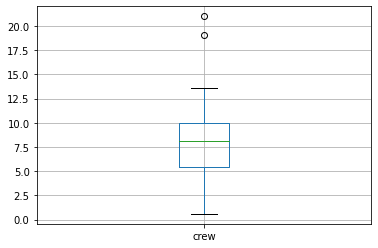

In [9]:
# CREW ANALYSIS -- BOXPLOT

crew_boxplot = df.boxplot(column=['crew'])

**Dispersion Analysis**

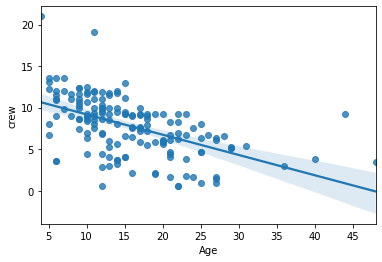

In [13]:
crew_age = sns.regplot(x=df["Age"], y=df["crew"])

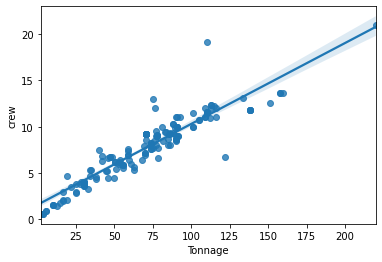

In [12]:
crew_tonnage = sns.regplot(x=df["Tonnage"], y=df["crew"])


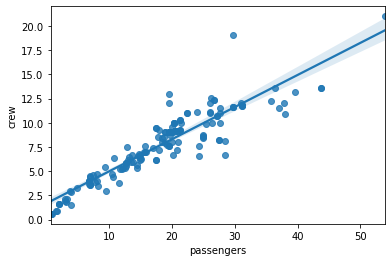

In [14]:
crew_pass = sns.regplot(x=df["passengers"], y=df["crew"])

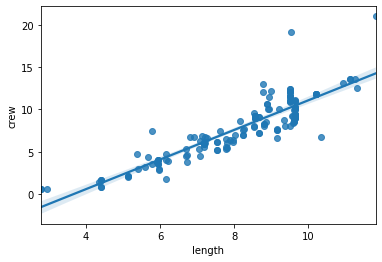

In [15]:
crew_length = sns.regplot(x=df["length"], y=df["crew"])

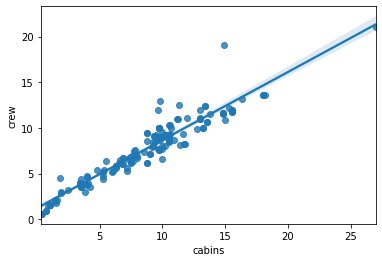

In [16]:
crew_cabins = sns.regplot(x=df["cabins"], y=df["crew"])

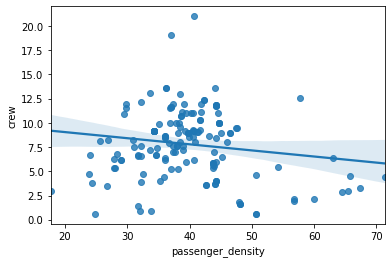

In [17]:
crew_denpass = sns.regplot(x=df["passenger_density"], y=df["crew"])

**Correlation Analysis**

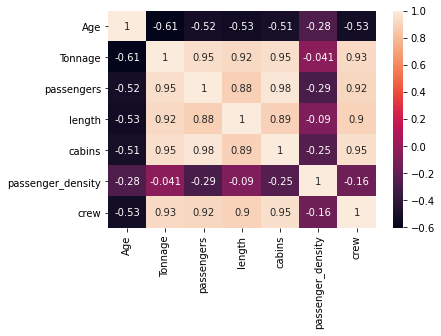

In [ ]:
corr = df.corr()

sns.heatmap(corr, annot = True, yticklabels=corr.columns, xticklabels=corr.columns)

For our Exploratory Data Analysis, we start assesing the most important variable for the recommendation algorithm: crew members. 

A remarkable fact is that the standard deviation is considerable: 44.92%. The latter means that our data extends through a large range around the median value. Likewise, the bloxpot graph allows to see the existance of few outliers which might have an impact on the position of our mean value.

The most outstanding discovery of the EDA process is the correlation between variables. We start from assigning crew members as a dependant value in the y axis and the independent value in the x axis for the remaining values. We're, thus, assuming that the number of crew members depends on the condition of the ship -- e.g. the oldest or larger the ship is, a more significant crew is needed to attend the ship. 

There's a strong correlation in 5 of the 7 independent variables analyzed, which are going to be part of the model to be trained. 

# 3 and 4. Column Selection and Deleting

For our project, we're going to make an algorithm which recommends a number of crew members based on relatable variables such as cabins, tonnage, passengers capacity and length. Age and passenger density are being deleted because they doesn't provide further information value given the results of the scatter plots and heatmap during the EDA process.

We'll also delete de Ship_name and Cruise_line column, because they're cathegorical values that doesn't provide further numeric value based on ordinal relationships or a binary system. 

In [19]:
working_df = df.drop(["Ship_name", "Cruise_line", "Age", "passenger_density"], axis=1)
working_df

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00
...,...,...,...,...,...
153,3.341,0.66,2.79,0.33,0.59
154,76.800,19.60,8.79,9.67,12.00
155,5.350,1.58,4.40,0.74,0.88
156,5.350,1.67,4.40,0.74,0.88




# 5. One-Hot Encoding

In [20]:
ct = ColumnTransformer([("Cruise_line", OneHotEncoder(), [1])], remainder = 'passthrough')
ohe_df = ct.fit_transform(df)
pd.DataFrame(ohe_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Journey,6,30.277,6.94,5.94,3.55,42.64,3.55
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Quest,6,30.277,6.94,5.94,3.55,42.64,3.55
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Celebration,26,47.262,14.86,7.22,7.43,31.8,6.7
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Conquest,11,110,29.74,9.53,14.88,36.99,19.1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Destiny,17,101.353,26.42,8.92,13.21,38.36,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Taurus,22,3.341,0.66,2.79,0.33,50.62,0.59
154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Virgo,14,76.8,19.6,8.79,9.67,39.18,12
155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Spirit,25,5.35,1.58,4.4,0.74,33.86,0.88
156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Star,27,5.35,1.67,4.4,0.74,32.04,0.88


# 6. Clusters for Training and Testing

In [21]:
# Outliers cleaning with interquartile range

Q1 = working_df.quantile(0.25)
Q3 = working_df.quantile(0.75)
IQR = Q3 - Q1
IQR

Tonnage       44.7595
passengers    12.3100
length         2.4100
cabins         4.7525
crew           4.5100
dtype: float64

In [22]:
print(working_df < (Q1 - 1.5 * IQR)) or (working_df > (Q3 + 1.5 * IQR))

     Tonnage  passengers  length  cabins   crew
0      False       False   False   False  False
1      False       False   False   False  False
2      False       False   False   False  False
3      False       False   False   False  False
4      False       False   False   False  False
..       ...         ...     ...     ...    ...
153    False       False    True   False  False
154    False       False   False   False  False
155    False       False   False   False  False
156    False       False   False   False  False
157    False       False   False   False  False

[158 rows x 5 columns]


,Tonnage,passengers,length,cabins,crew
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,False
...,...,...,...,...,...
153,False,False,False,False,False
154,False,False,False,False,False
155,False,False,False,False,False
156,False,False,False,False,False


In [23]:
clean_df = working_df[~((working_df < (Q1 - 1.5 * IQR)) | (working_df > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_df

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
4,101.353,26.42,8.92,13.21,10.00
5,70.367,20.52,8.55,10.20,9.20
...,...,...,...,...,...
152,40.053,12.87,5.79,7.76,7.50
154,76.800,19.60,8.79,9.67,12.00
155,5.350,1.58,4.40,0.74,0.88
156,5.350,1.67,4.40,0.74,0.88


In [24]:
# Obtaining an Aleatory Sample (60% of total clean data)

sample_df = clean_df.sample(frac=0.6)
sample_df

,Tonnage,passengers,length,cabins,crew
59,55.451,12.66,7.19,6.33,5.88
24,70.606,17.70,8.15,8.75,8.58
157,14.745,3.08,6.17,1.56,1.80
50,83.338,17.50,9.64,8.75,9.45
145,16.800,2.96,5.14,1.48,2.10
...,...,...,...,...,...
132,73.941,27.44,8.80,11.77,8.22
47,70.327,17.91,9.63,9.50,9.21
101,113.000,26.74,9.51,13.37,12.38
127,90.090,25.01,9.62,10.94,8.69


In [25]:
y = sample_df["crew"]
X = sample_df[["Tonnage", "passengers", "length", "cabins"]].iloc[:,0:4].values

print(X.shape)
print(y.shape)

(90, 4)
(90,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(23, 4)
(67, 4)
(23,)
(67,)


# 7. Model Training

In [29]:
reg = LinearRegression().fit(X_train, y_train)
y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

(-10.0, 50.0)

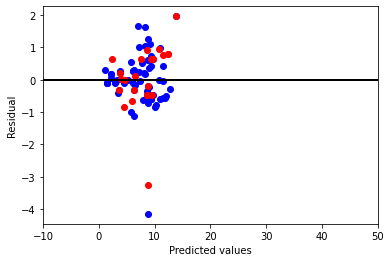

In [32]:
plt.scatter(y_train_predict,  y_train_predict - y_train,
            c='blue')       
plt.scatter(y_test_predict,  y_test_predict - y_test,
            c='red')
plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])

# 8. Hyperparameters and Conclusions



In [35]:
rmse = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)

print(rmse)
print(r2)

0.6600178607455991
0.9356032340986901


In this case, we worked with few nodes and layers for the machine learning process. This impacted on the high R² score. 

The hiperparameters were obtained by excluding outliers from the model and work on a short sample that was representative of the whole dataframe. 